In [28]:
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils import *

np.random.seed(42)

### First, load the data

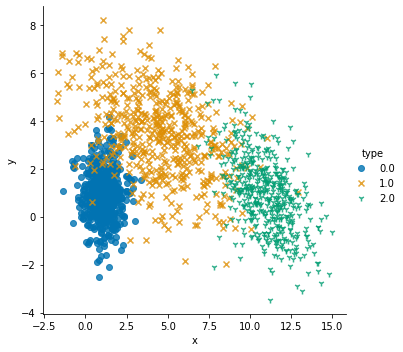

In [59]:
X, labels = classification_2D_dataset()
df = pd.DataFrame(np.hstack([X,labels[:, np.newaxis]]),columns=["x", "y", "type"])
sns.lmplot( x="x", y="y", data=df, 
           fit_reg=False, hue="type", 
           legend=True, markers=["o", "x", "1"], palette="colorblind")
plt.show()

> And also, a grid plot for comparing two by two scatter plots of continuous quantities.

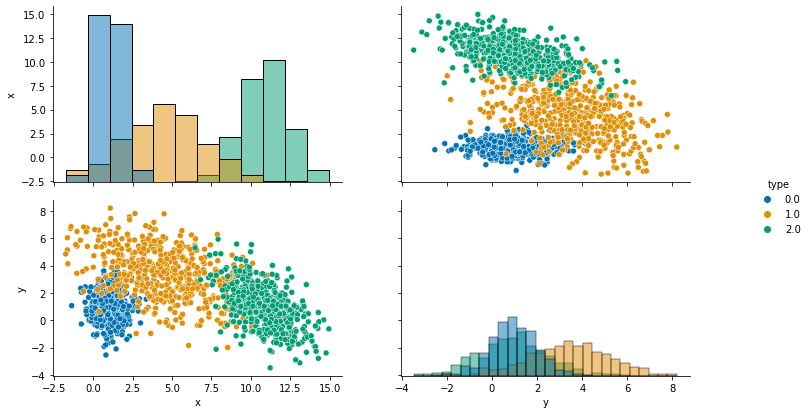

In [68]:
g = sns.PairGrid(df, hue="type", palette="colorblind")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
g.fig.set_size_inches(12,6)
plt.show()

### Divide the dataset to Train and test, using scikit-learn __train_test_split__ function

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

### Train the model by __Logistic Regression__ model and predict the values of the test set.

In [70]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [72]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy*100:.1f}%")


Prediction Accuracy: 92.9%


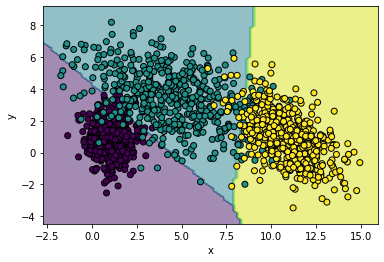

In [78]:
from sklearn.inspection import DecisionBoundaryDisplay
areas = DecisionBoundaryDisplay.from_estimator(reg, X, response_method="predict",
     xlabel="x", ylabel="y",
     alpha=0.5,
 )
areas.ax_.scatter(X[:, 0], X[:, 1], c=labels, edgecolor="k")
plt.show()